Dependências

In [11]:
!pip install tensorflow numpy matplotlib scikit-learn pydot

1. Verificando Disponibilidade da GPU

In [12]:
import tensorflow as tf

device_name = tf.test.gpu_device_name()
if device_name:
    print("GPU está ativa e pronta para uso:", device_name)
else:
    print("GPU NÃO está ativa. Verifique as configurações.")

GPU NÃO está ativa. Verifique as configurações.


2. Importando as Bibliotecas Necessárias

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import layers, models
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.layers import DepthwiseConv2D as OriginalDepthwiseConv2D
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array


In [14]:
class CustomDepthwiseConv2D(OriginalDepthwiseConv2D):
    def __init__(self, *args, **kwargs):
        # Remove o argumento 'groups' se estiver presente
        if 'groups' in kwargs:
            kwargs.pop('groups')
        super(CustomDepthwiseConv2D, self).__init__(*args, **kwargs)

# Cria um dicionário de objetos customizados para ser passado ao load_model
custom_objects = {'DepthwiseConv2D': CustomDepthwiseConv2D}

3. Carregar o Modelo

In [15]:
model_path = "./content/model.h5"  # Ajuste o caminho para onde o seu modelo está armazenado
model = load_model(model_path, custom_objects=custom_objects)
print("Modelo carregado com sucesso!")

/Users/kalebeandrade/miniconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Modelo carregado com sucesso!


In [16]:
# Para conferir o sumário do modelo (opcional):
model.summary()


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential_1 (Sequential)       │ (None, 1280)           │       410,208 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ sequential_3 (Sequential)       │ (None, 2)              │       128,300 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 538,508 (2.05 MB)

 Trainable params: 524,428 (2.00 MB)

 Non-trainable params: 14,080 (55.00 KB)

In [17]:
# Compile o modelo para poder usar evaluate() e outros métodos de treinamento
model.compile(optimizer='adam',
              loss='binary_crossentropy',  # ou 'binary_crossentropy' se for 2 classes
              metrics=['accuracy'])
print("Modelo compilado!")

Modelo compilado!


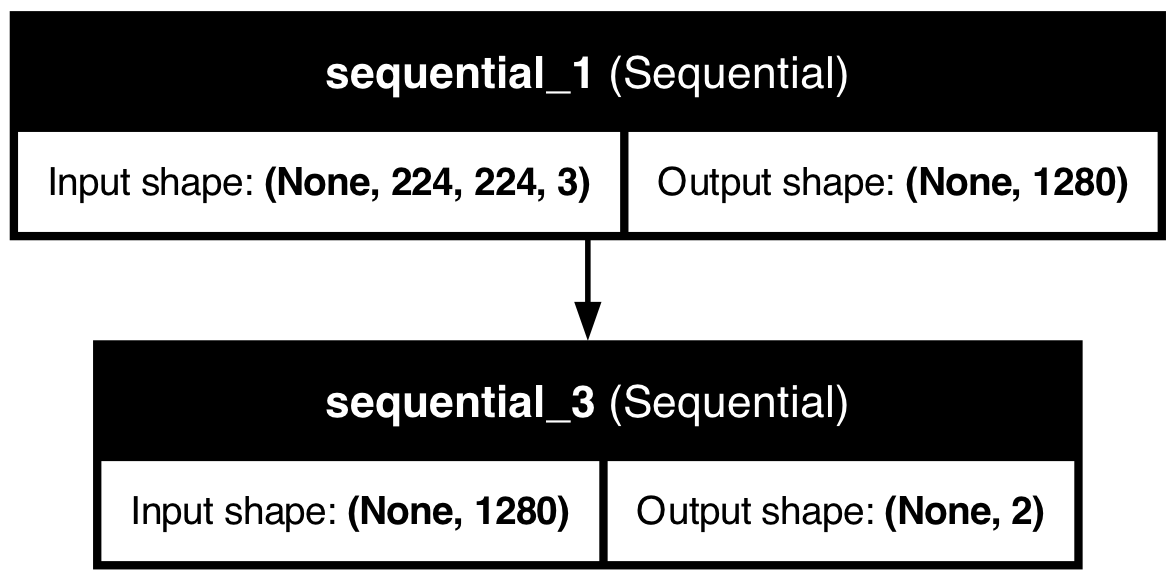

In [18]:
from tensorflow.keras.utils import plot_model

# Visualizar a arquitetura do modelo
plot_model(model, to_file='model_architecture.png', show_shapes=True, show_layer_names=True)

4. Preparar Dadaset de test

In [19]:
test_dir = "./content/test_data"
img_height, img_width = 224, 224  # Ajuste o tamanho conforme seu modelo
batch_size = 32

5. Preparando as imagens de testes

In [20]:
# Criar gerador de dados para normalização
test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
    directory=test_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    classes=['cats', 'dogs'],  # Defina aqui apenas as classes corretas
    class_mode='categorical',
    shuffle=False
)

print("Classes encontradas:", test_generator.class_indices)

Found 2023 images belonging to 2 classes.
Classes encontradas: {'cats': 0, 'dogs': 1}


5. Avaliar o Modelo no Conjunto de Teste

In [21]:
loss, accuracy = model.evaluate(test_generator, verbose=1)
print(f"Acurácia do modelo no teste: {accuracy:.2f}")

/Users/kalebeandrade/miniconda3/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


64/64 ━━━━━━━━━━━━━━━━━━━━ 4s 55ms/step - accuracy: 0.9467 - loss: 0.2897
Acurácia do modelo no teste: 0.96


In [22]:
# Reinicia o gerador para garantir a ordem correta
test_generator.reset()

predictions_list = []
true_labels_list = []

In [23]:
# Itera sobre os batches do gerador
for i in range(len(test_generator)):
    x_batch, y_batch = test_generator[i]
    preds_batch = model.predict(x_batch)
    predictions_list.append(preds_batch)
    true_labels_list.append(y_batch)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 399ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━

6. Obter Previsões e Métricas

In [24]:
# Concatena os resultados de todos os batches
predictions = np.concatenate(predictions_list, axis=0)
true_labels = np.concatenate(true_labels_list, axis=0)
# Se os rótulos tiverem mais de uma dimensão, achate para 1D
if true_labels.ndim > 1:
    true_labels = true_labels.flatten()

# Converte as previsões para rótulos binários
y_pred = (predictions > 0.5).astype("int32").flatten()

In [25]:
print("\nRelatório de Classificação:")
print(classification_report(true_labels, y_pred, target_names=['caes', 'gato']))


Relatório de Classificação:
              precision    recall  f1-score   support

        caes       0.96      0.96      0.96      2023
        gato       0.96      0.96      0.96      2023

    accuracy                           0.96      4046
   macro avg       0.96      0.96      0.96      4046
weighted avg       0.96      0.96      0.96      4046



In [26]:
cm = confusion_matrix(true_labels, y_pred)
print("Matriz de Confusão:\n", cm)

Matriz de Confusão:
 [[1940   83]
 [  83 1940]]


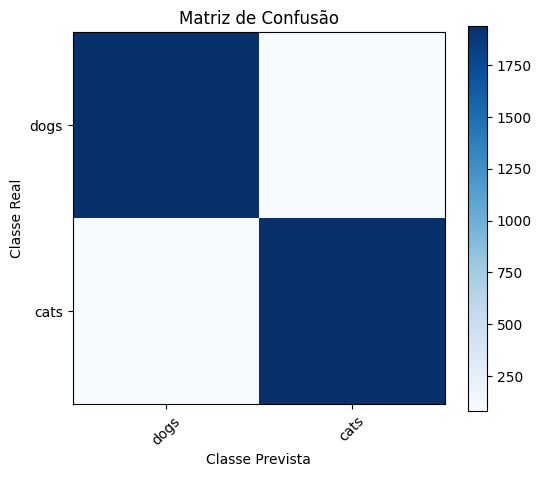

In [27]:
plt.figure(figsize=(6, 5))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title("Matriz de Confusão")
plt.colorbar()
tick_marks = np.arange(2)
plt.xticks(tick_marks, ['dogs', 'cats'], rotation=45)
plt.yticks(tick_marks, ['dogs', 'cats'])
plt.xlabel("Classe Prevista")
plt.ylabel("Classe Real")
plt.show()

7. Testar Imagem Individual

In [28]:
img_height, img_width = 224, 224  # ajuste conforme seu modelo

# Defina a lista de labels na ordem correta: [classe para 0, classe para 1]
labels = ['dogs', 'cats']

In [29]:
def predict_single_image(img_path, model, labels):
    """
    Carrega uma imagem individual e faz previsão usando o modelo carregado.
    Para classificação binária, assume que o modelo retorna uma probabilidade única.
    """
    # Carrega e redimensiona a imagem
    img = load_img(img_path, target_size=(img_height, img_width))
    # Converte a imagem para array e normaliza
    img_array = img_to_array(img) / 255.0
    # Expande dimensões para [1, height, width, canais]
    img_array = np.expand_dims(img_array, axis=0)

    # Faz a previsão
    pred = model.predict(img_array)
    # Para classificação binária: se pred[0][0] < 0.5, a previsão é a primeira classe; caso contrário, a segunda.
    predicted_label = labels[0] if pred[0][0] < 0.5 else labels[1]
    return predicted_label

In [30]:
teste_img = "./content/test_outher/caes-2.jpg"  # Ajuste o caminho conforme necessário
resultado = predict_single_image(teste_img, model, labels)
print(f"Imagem: {teste_img} | Classe Prevista: {resultado}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
Imagem: ./content/test_outher/caes-2.jpg | Classe Prevista: dogs


8.Retreinamento do Modelo

In [36]:
# Definição de parâmetros
img_height = 150  # Altura das imagens
img_width = 150  # Largura das imagens
batch_size = 32  # Tamanho do batch
epochs = 10  # Número de épocas para treinamento


train_dir = "./content/train"
validation_dir = "./content/validate"

# Criar geradores de dados para normalização
train_datagen = ImageDataGenerator(rescale=1. / 255)
validation_datagen = ImageDataGenerator(rescale=1. / 255)

# Criar geradores de dados para normalização com rescale
train_datagen = ImageDataGenerator(rescale=1. / 255)
validation_datagen = ImageDataGenerator(rescale=1. / 255)

# Gerador de imagens para o conjunto de treinamento
train_generator = train_datagen.flow_from_directory(
    directory=train_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    classes=['cats', 'dogs'],  # Classes devem ser subpastas no diretório
    class_mode='categorical'  # Gera rótulos possíveis: [1, 0] ou [0, 1]
)

# Gerador de imagens para o conjunto de validação
validation_generator = validation_datagen.flow_from_directory(
    directory=validation_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    classes=['cats', 'dogs'],
    class_mode='categorical'
)

# Retreinamento do modelo
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size,
    epochs=epochs  # Ajuste conforme necessário
)

Found 20000 images belonging to 2 classes.
Found 5000 images belonging to 2 classes.
Epoch 1/10
151/625 ━━━━━━━━━━━━━━━━━━━━ 1:27 185ms/step - accuracy: 0.9102 - loss: 0.2269

2025-03-15 18:12:45.292392: W tensorflow/core/framework/op_kernel.cc:1844] UNKNOWN: UnidentifiedImageError: cannot identify image file <_io.BytesIO object at 0x3224fe750>
Traceback (most recent call last):

  File "/Users/kalebeandrade/miniconda3/lib/python3.12/site-packages/tensorflow/python/ops/script_ops.py", line 269, in __call__
    ret = func(*args)
          ^^^^^^^^^^^

  File "/Users/kalebeandrade/miniconda3/lib/python3.12/site-packages/tensorflow/python/autograph/impl/api.py", line 643, in wrapper
    return func(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^

  File "/Users/kalebeandrade/miniconda3/lib/python3.12/site-packages/tensorflow/python/data/ops/from_generator_op.py", line 198, in generator_py_func
    values = next(generator_state.get_iterator(iterator_id))
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

  File "/Users/kalebeandrade/miniconda3/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py", line 248, in _finite_

UnknownError: Graph execution error:

Detected at node PyFunc defined at (most recent call last):
<stack traces unavailable>
UnidentifiedImageError: cannot identify image file <_io.BytesIO object at 0x3224fe750>
Traceback (most recent call last):

  File "/Users/kalebeandrade/miniconda3/lib/python3.12/site-packages/tensorflow/python/ops/script_ops.py", line 269, in __call__
    ret = func(*args)
          ^^^^^^^^^^^

  File "/Users/kalebeandrade/miniconda3/lib/python3.12/site-packages/tensorflow/python/autograph/impl/api.py", line 643, in wrapper
    return func(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^

  File "/Users/kalebeandrade/miniconda3/lib/python3.12/site-packages/tensorflow/python/data/ops/from_generator_op.py", line 198, in generator_py_func
    values = next(generator_state.get_iterator(iterator_id))
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

  File "/Users/kalebeandrade/miniconda3/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py", line 248, in _finite_generator
    yield self._standardize_batch(self.py_dataset[i])
                                  ~~~~~~~~~~~~~~~^^^

  File "/Users/kalebeandrade/miniconda3/lib/python3.12/site-packages/keras/src/legacy/preprocessing/image.py", line 68, in __getitem__
    return self._get_batches_of_transformed_samples(index_array)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

  File "/Users/kalebeandrade/miniconda3/lib/python3.12/site-packages/keras/src/legacy/preprocessing/image.py", line 313, in _get_batches_of_transformed_samples
    img = image_utils.load_img(
          ^^^^^^^^^^^^^^^^^^^^^

  File "/Users/kalebeandrade/miniconda3/lib/python3.12/site-packages/keras/src/utils/image_utils.py", line 236, in load_img
    img = pil_image.open(io.BytesIO(f.read()))
          ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

  File "/Users/kalebeandrade/miniconda3/lib/python3.12/site-packages/PIL/Image.py", line 3532, in open
    raise UnidentifiedImageError(msg)

PIL.UnidentifiedImageError: cannot identify image file <_io.BytesIO object at 0x3224fe750>


	 [[{{node PyFunc}}]]
	 [[IteratorGetNext]] [Op:__inference_multi_step_on_iterator_88220]